# Student Performance

## Library

In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# EDA - Exploratory Data Analysis

In [38]:
data = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

In [39]:
data.head(6)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0


In [40]:
data.shape

(10000, 6)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


We need to convert the **"Extracurricular Activities"** column to numeric format. Because we are preparing it for machine learning and the machine only understands numeric values.

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


## Missing Values

In [43]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**we don't have any null values**

## Handling Categorical Data

In [44]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [45]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({"No":0, "Yes":1})

In [46]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


**All categorical values were converted into numerical format.**

## Correlation

In [47]:
# Calculate the correlation matrix for the 'data' DataFrame
corr = data.corr()

# Sort the correlations for the 'Performance Index' column in descending order
top_corr = corr['Performance Index'].sort_values(ascending=False)[1:10].to_frame()

# Apply a background gradient to visually represent the correlations using the seaborn library
styled_corr = top_corr.style.background_gradient(axis=1, cmap=sns.light_palette('green', as_cmap=True))#Ciktiyi sns kutuphanesini kullanarak renklendirip gorsellestirdik.

styled_corr

,Performance Index
Previous Scores,0.915189
Hours Studied,0.373730
Sleep Hours,0.048106
Sample Question Papers Practiced,0.043268
Extracurricular Activities,0.024525


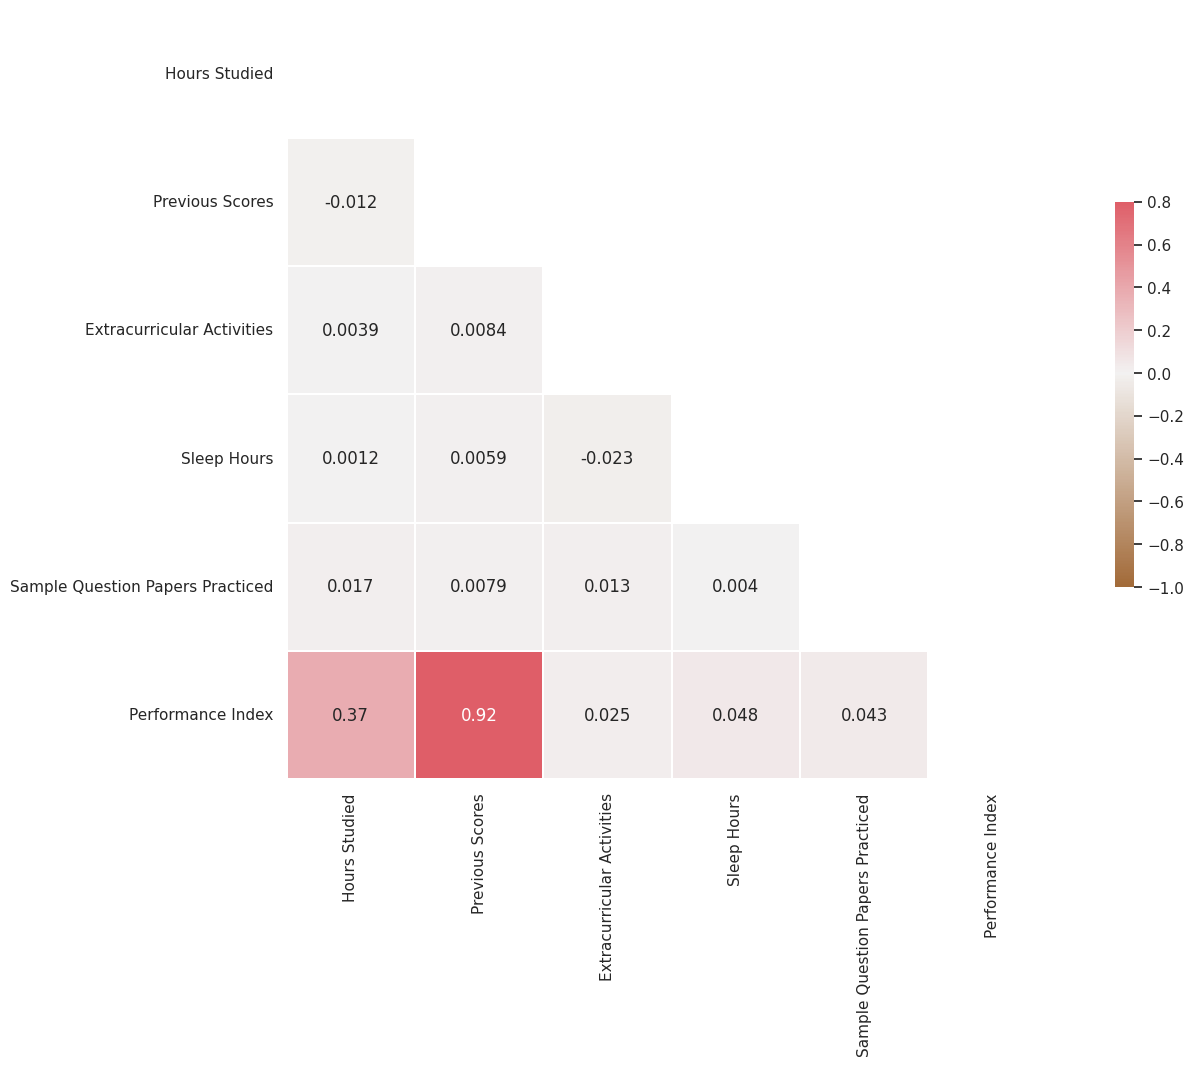

In [48]:
# Calculate the correlation matrix
corr = data.corr()

# Create a triangular mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set the color palette
cmap = sns.diverging_palette(40, 10, as_cmap=True)

# Draw the heatmap on a white background
with sns.axes_style('white'):
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(15, 10))

    # Draw the correlation matrix as a heatmap, using the triangular mask
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink': 0.5, 'orientation': 'vertical'}, linewidth=.02)
    
# Show the plot
plt.show()


## Outliers

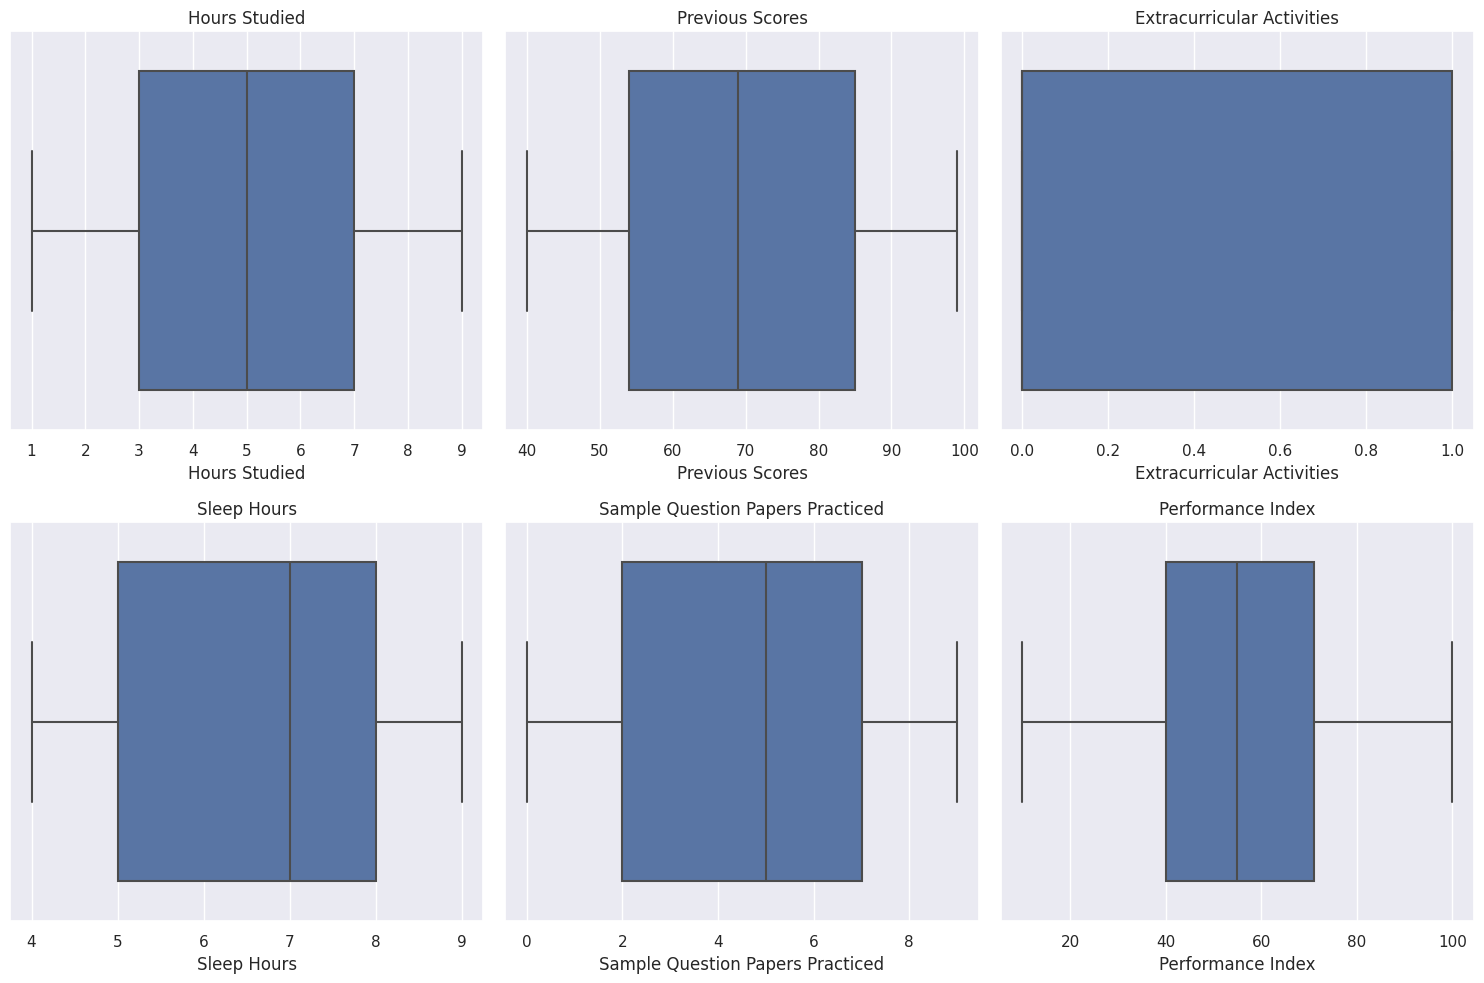

In [49]:
# Set the size of the overall plot
plt.figure(figsize=(15, 10))

# Define the number of columns to display in each row
num_cols_per_row = 3

# Iterate over each column
for i, col in enumerate(data.columns, start=1):
    plt.subplot((len(data.columns) + num_cols_per_row - 1) // num_cols_per_row, num_cols_per_row, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()

plt.show()

**No Outliers in the given data**

## Skewness

**If the skews were larger than 0.75 we would have corrected them, but this is not necessary in this dataset.**

In [50]:
# Create a list of numerical features
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Calculate skewness for each numerical feature
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Display the results
print("\nSkew in numerical features: \n")

# Create a DataFrame containing skewness values
skewness = pd.DataFrame({'Skew' :skewed_feats})

# Display the top 10 skewness values
skewness.head(10)



Skew in numerical features: 



,Skew
Extracurricular Activities,0.020801
Previous Scores,0.004501
Performance Index,-0.001740
Hours Studied,-0.004212
Sample Question Papers Practiced,-0.035631
Sleep Hours,-0.039468


# Visualizations

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


## Hours Studied

In [52]:
data["Hours Studied"].unique().tolist()

[7, 4, 8, 5, 3, 6, 2, 1, 9]

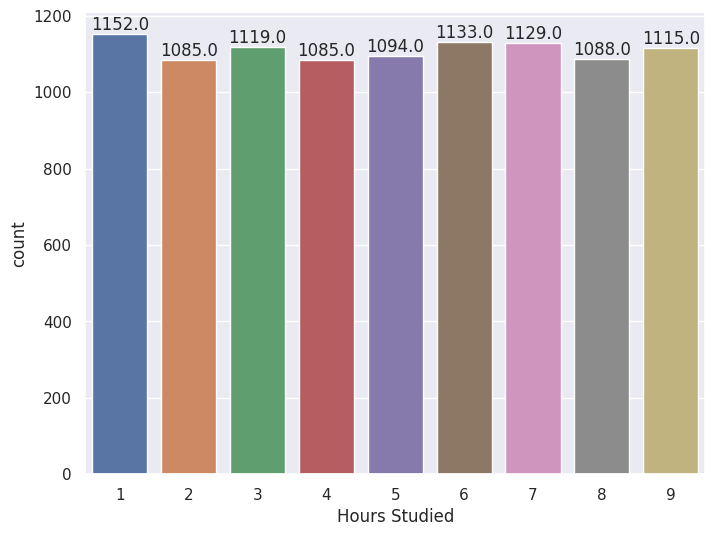

In [53]:
# Set the style of the Seaborn library to "darkgrid"
sns.set(style="darkgrid")

# Define the size of the figure
plt.figure(figsize=(8, 6))

# Create a count plot based on the "Hours Studied" variable
sns.countplot(x=data["Hours Studied"], palette="deep")

# Add frequency values above the bars
for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().annotate(f'{height}', (patch.get_x() + patch.get_width() / 2., height),
                       ha='center', va='bottom')

# Display the plot
plt.show()

## Previous Scores

In [54]:
data['Previous Scores'].unique()

array([99, 82, 51, 52, 75, 78, 73, 45, 77, 89, 91, 79, 47, 72, 83, 54, 96,
       74, 85, 61, 62, 84, 94, 90, 44, 70, 67, 97, 59, 55, 68, 63, 46, 76,
       43, 81, 93, 98, 48, 92, 64, 88, 60, 87, 40, 69, 80, 95, 49, 50, 53,
       71, 56, 58, 66, 65, 57, 41, 42, 86])

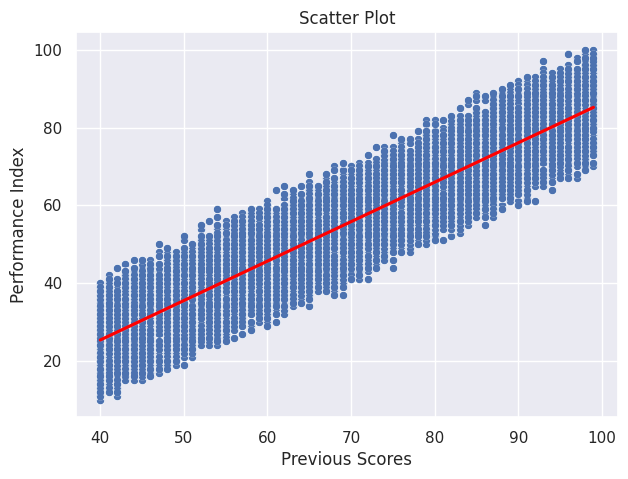

In [55]:
plt.figure(figsize=(7, 5), dpi=100)

# Scatter plot
sns.scatterplot(data=data, x="Previous Scores", y="Performance Index")
sns.regplot(data=data, x="Previous Scores", y="Performance Index", scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot')

plt.show()

## Extracurricular Activities

In [56]:
data["Extracurricular Activities"].unique().tolist()

[1, 0]

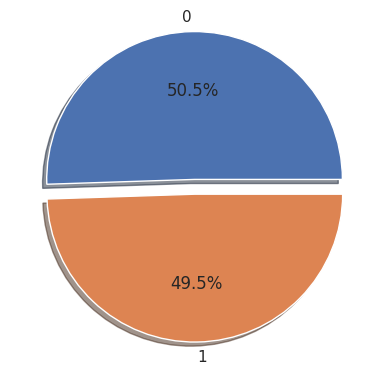

In [57]:
# Create an explode tuple to separate the first slice a bit
explode = (0.1, 0, 0, 0)

# Create an explode list for the number of slices
explode_list = [0.1 if i == 0 else 0 for i in range(len(data["Extracurricular Activities"].value_counts()))]

# Create a pie chart using the counts of each extracurricular activity
plt.pie(data["Extracurricular Activities"].value_counts(), 
        labels=data["Extracurricular Activities"].value_counts().index,
        explode=explode_list, autopct="%1.1f%%", shadow=True)

# Display the pie chart
plt.show()

## Sleep Hours

In [58]:
data['Sleep Hours'].unique().tolist()

[9, 4, 7, 5, 8, 6]

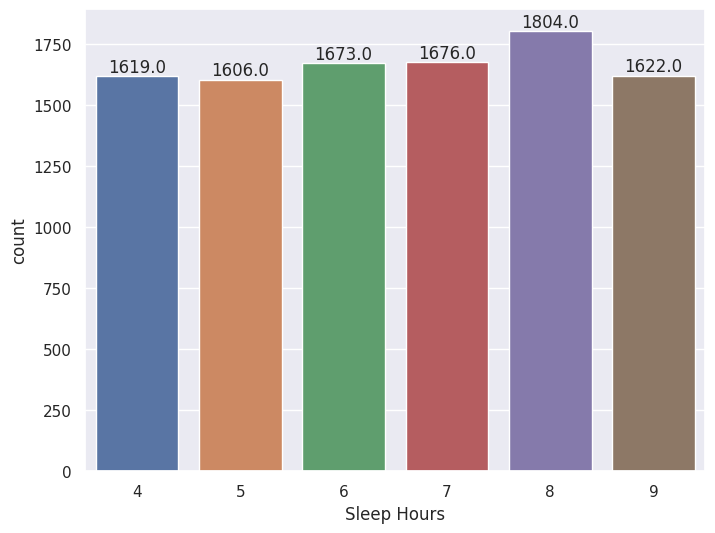

In [59]:
# Select the style
sns.set(style="darkgrid")

# Define a figure for creating the plot
plt.figure(figsize=(8, 6))

# Create a count plot using the "Sleep Hours" column in the data frame
sns.countplot(x=data["Sleep Hours"], palette="deep")

# Add frequency values above each bar
for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().annotate(f'{height}', (patch.get_x() + patch.get_width() / 2., height),
                       ha='center', va='bottom')

# Show the plot
plt.show()

## Sample Question Papers Practiced

In [60]:
data['Sample Question Papers Practiced'].unique().tolist()

[1, 2, 5, 6, 0, 8, 3, 4, 9, 7]

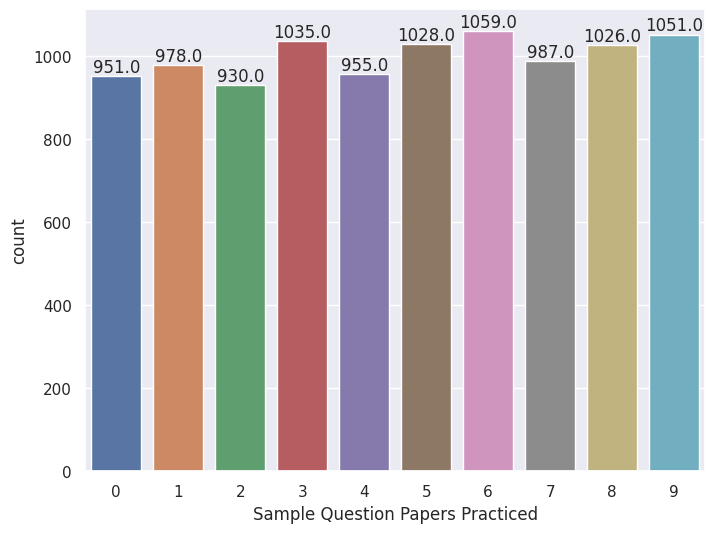

In [61]:
# Set the plotting style to darkgrid
sns.set(style="darkgrid")

# Create a figure for the plot with a specified size
plt.figure(figsize=(8, 6))

# Create a count plot based on the "Sample Question Papers Practiced" column in the data
sns.countplot(x=data["Sample Question Papers Practiced"], palette="deep")

# Add frequency values above each bar
for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().annotate(f'{height}', (patch.get_x() + patch.get_width() / 2., height),
                       ha='center', va='bottom')

# Show the plot
plt.show()

## Hours Studied - Performance Index

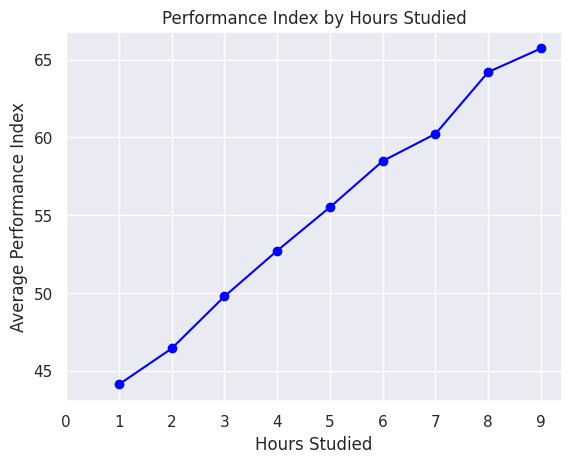

In [62]:
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()

plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values, color='blue', linestyle='-', marker='o')
plt.title('Performance Index by Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.grid(True)
plt.xticks(range(0, max(avg_performance_by_hours.index)+1, 1))  # X ekseni aralıkları
plt.show()


## Previous Scores - Performance Index

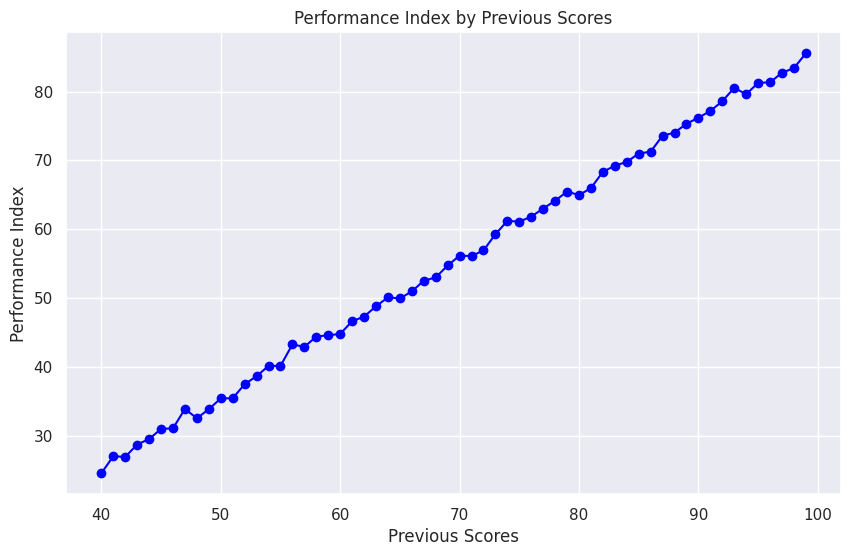

In [63]:
# Group the data and calculate the mean based on the 'Previous Scores' column
avg_performance_by_scores = data.groupby('Previous Scores')['Performance Index'].mean()

# Specify a figure for creating the plot
plt.figure(figsize=(10, 6))

# Plot the line graph representing the average Performance Index
plt.plot(avg_performance_by_scores.index, avg_performance_by_scores.values, color='blue', linestyle='-', marker='o', label='Average Performance Index')

# Set the title, x-axis label, and y-axis label for the graph
plt.title('Performance Index by Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

# Add gridlines to the plot
plt.grid(True)

# Show the plot
plt.show()

## Spliting the dataset

In [64]:
X = data.drop('Performance Index',axis=1)
y = data['Performance Index']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2 ,random_state=42)

# Model

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(X_test) 

In [68]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R2 = {r2}\nRMSE = {rmse}\nMAE = {mae}")

R2 = 0.9889832909573145
RMSE = 2.0205515085050054
MAE = 1.6111213463123044


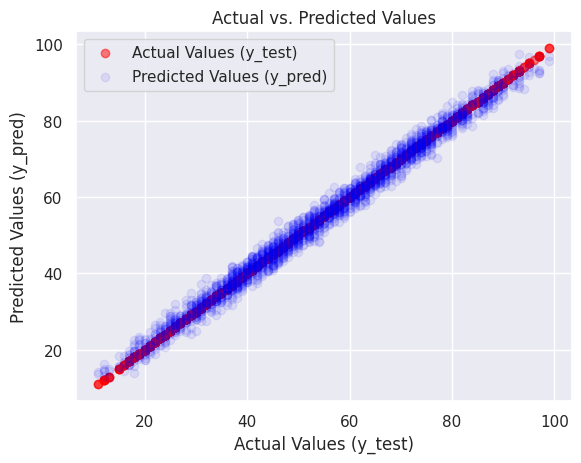

In [69]:
# Scatter plot for actual values (y_test) in red with some transparency
plt.scatter(y_test, y_test, c='red', label='Actual Values (y_test)', alpha=0.5)

# Scatter plot for predicted values (y_pred) in blue with lower transparency
plt.scatter(y_test, y_pred, c='blue', label='Predicted Values (y_pred)', alpha=0.08)

# Add x and y axis labels
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')

# Add a title to the plot
plt.title('Actual vs. Predicted Values')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

## Is it Overfit?

In [70]:
# Perform 5-fold cross-validation (cv=5) using linear regression model (lr)
cross_val_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:")
print(cross_val_scores)

print("Mean Squared Error:", -cross_val_scores.mean())

Cross-Validation Scores:
[-4.19513946 -4.16307161 -3.95266512 -4.21709366 -4.24718299]
Mean Squared Error: 4.155030567329237


**Values are close to each other, overfit does not appear**

**Coefficients**

In [71]:
lr.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

**Intercept**

In [72]:
lr.intercept_

-33.92194621555638

### Equation of our model:

**2.85** **×** Previous Scores **+** **1.02** **×** Hours Studied **+** **0.61** **×** Extracurricular Activities **+** **0.48** **×** Sleep Hours **+** **0.19** **×** Sample Question Papers Practiced **- 33.92**